**Importing Models**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Data Preparation**

In [ ]:
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Here we are considering load_digits dataset which is also known as Optical Recognition of Handwritten Digits, it contains 1,797 sample, 64(8*8) features, 10 classes (0-9).

1) **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))
3

SVM:
Accuracy: 0.9833333333333333
Precision: 0.9837950257289881
Recall: 0.98315205758602
F1 Score: 0.9832814731575896


3

2) **K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))


KNN:
Accuracy: 0.9703703703703703
Precision: 0.9708766076430816
Recall: 0.9701864801864802
F1 Score: 0.9701811521313198


3) **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))


Random Forest:
Accuracy: 0.9685185185185186
Precision: 0.9694497352099546
Recall: 0.968158508158508
F1 Score: 0.9682059832770195


4) **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))


Logistic Regression:
Accuracy: 0.9814814814814815
Precision: 0.9815824915824916
Recall: 0.9814024864024862
F1 Score: 0.9814425703985172


5) **Deep Learning (MLP - Multi-layer Perceptron)**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

print("MLP (Deep Learning):")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, average='macro'))
print("Recall:", recall_score(y_test, y_pred_mlp, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average='macro'))


MLP (Deep Learning):
Accuracy: 0.9796296296296296
Precision: 0.9796625699721675
Recall: 0.9794120694120693
F1 Score: 0.9794721274788143


When we take a closer look at the results, it's pretty clear that the SVM (support vector machine) model is the standout performer. It shines with the highest scores in accuracy, precision, recall, and F1 score. This just goes to show how effective it is in tackling the challenges posed by complex datasets.



---



**6) CNN**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import cv2
import os

# Step 1: Load MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess Data
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train Model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 5: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.8532 - loss: 0.4775 - val_accuracy: 0.9805 - val_loss: 0.0638
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 58ms/step - accuracy: 0.9814 - loss: 0.0596 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9865 - val_loss: 0.0457
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9890 - val_loss: 0.0399
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9842 - loss: 0.0489
Test accuracy: 0.9883


Here we are using a CNN with two convolution layers, two max pooling layers, one flatten layer that converts 3D to 1D, one fully connected layer, and finally, one output layer.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted digit: 4


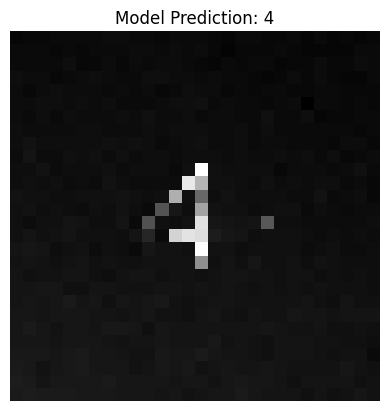

In [7]:
def preprocess_custom_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)  # Invert colors
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

# Example: Test with a custom image
custom_img = preprocess_custom_image("/content/numbers.jpg")  # Replace with your filename
prediction = model.predict(custom_img)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)

# Optional: visualize
plt.imshow(custom_img.reshape(28, 28), cmap='gray')
plt.title(f"Model Prediction: {predicted_digit}")
plt.axis("off")
plt.show()


I provided the handwritten number 4, and the prediction accurately confirmed it as 4. This demonstrates the effectiveness of the recognition system!